# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense



# Loading Data

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

# information of dataframe

In [3]:
print(f"Shape of train image is: {x_train.shape}\n")
print(f'Shape of test image is: {x_test.shape}')

Shape of train image is: (50000, 32, 32, 3)

Shape of test image is: (10000, 32, 32, 3)


In [4]:
print(f'Shape of train label is: {y_train.shape}\n')
print(f'Shape of test label is: {y_test.shape}')

Shape of train label is: (50000, 1)

Shape of test label is: (10000, 1)


# Displaying some random images from Training data

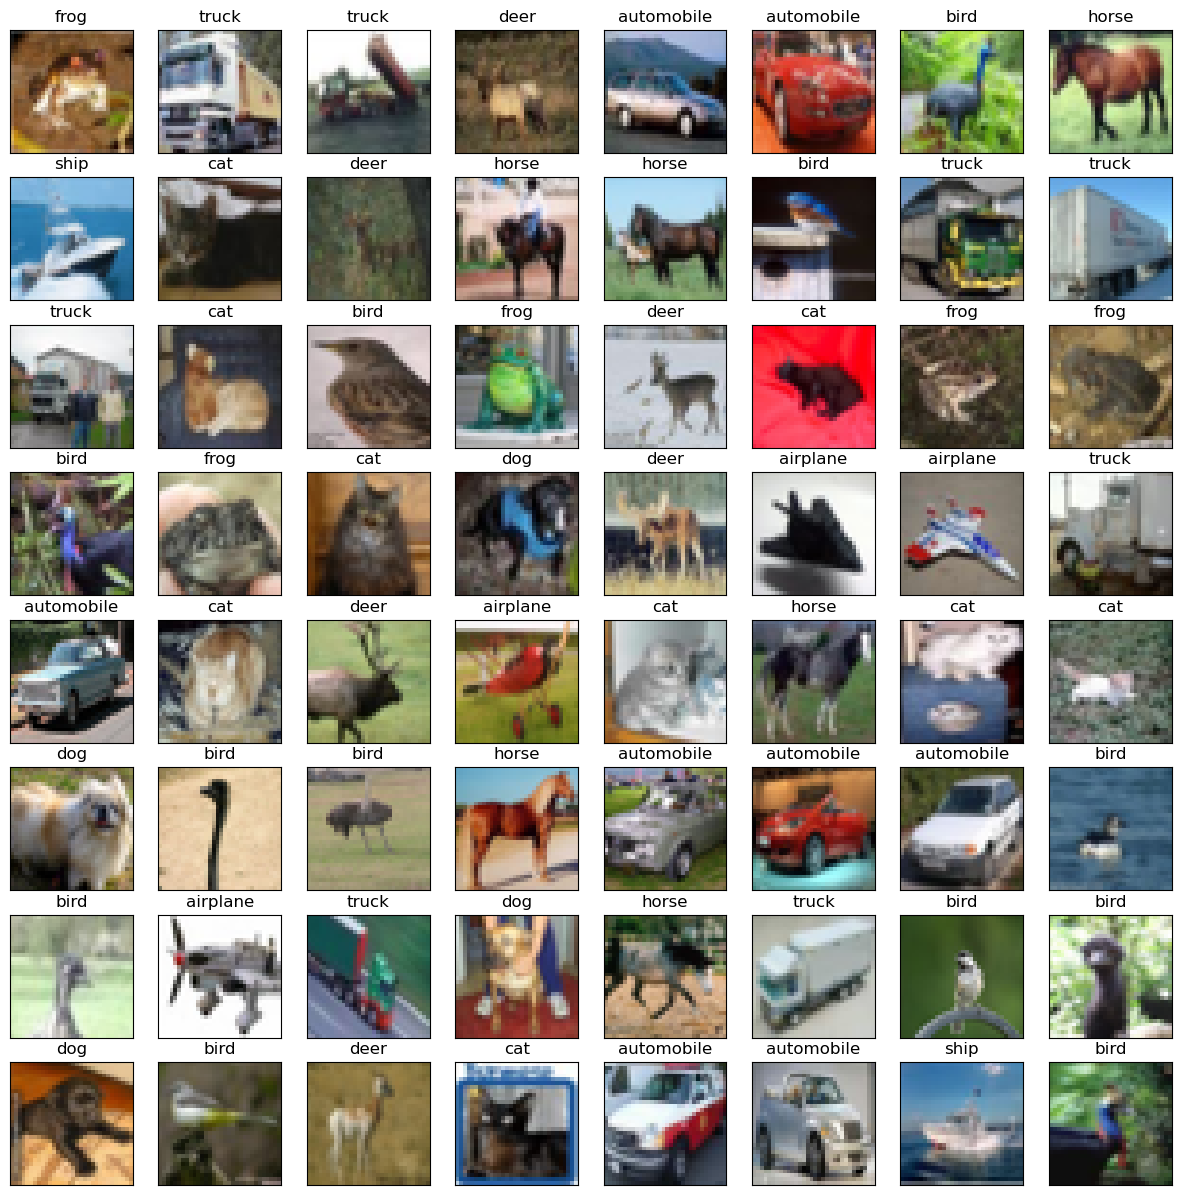

In [5]:
# CIFAR-10 classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])
    
  # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# Displaying some random images from Testing data

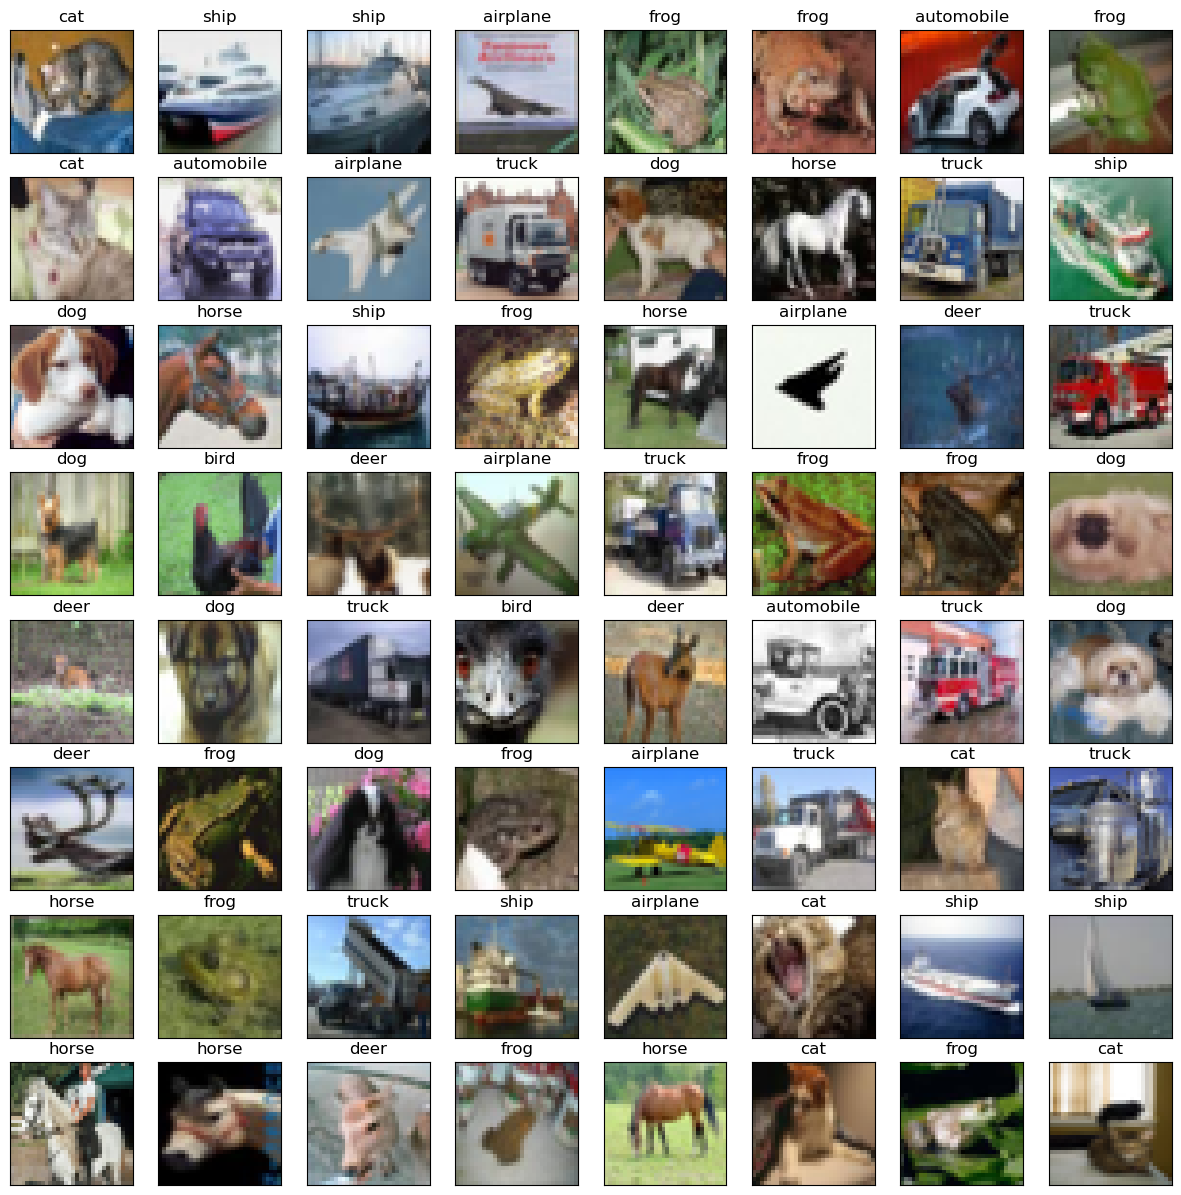

In [6]:
# CIFAR-10 classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_test[i])
    
  # Set the label as the title
    plt.title(class_names[y_test[i][0]], fontsize=12)

# Display the figure
plt.show()

# Converting labels from 2D to 1D

In [7]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

# Frequency of classes



In [8]:
classes = ["Airplane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]


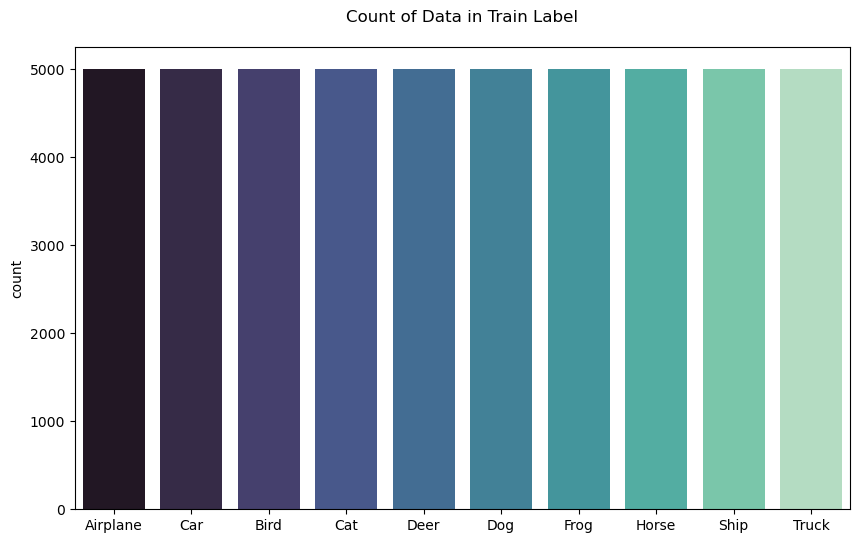

In [9]:
plt.figure(figsize = (10,6))
plt.title("Count of Data in Train Label\n", size = 12)

sns.countplot(x = y_train, palette='mako').set(xticklabels = classes);

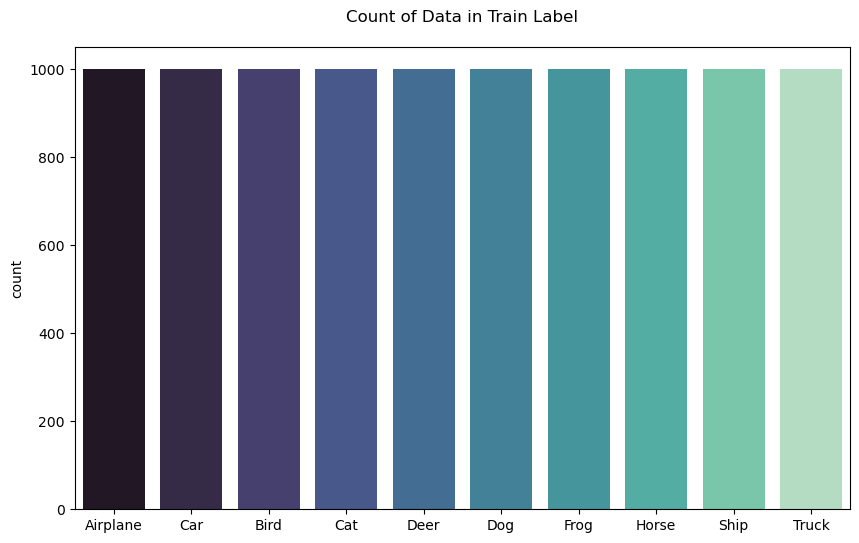

In [10]:
plt.figure(figsize = (10,6))
plt.title("Count of Data in Train Label\n", size = 12)

sns.countplot(x = y_test, palette='mako').set(xticklabels = classes);

# Normalizing pixel values

In [11]:
print(f"Maximum value in train_images is: {x_train.max()}")
print(f"Minimum value in train_images is: {x_train.min()}\n")

print(f"Maximum value in test_images is: {x_test.max()}")
print(f"Minimum value in test_images is: {x_test.min()}")

Maximum value in train_images is: 255
Minimum value in train_images is: 0

Maximum value in test_images is: 255
Minimum value in test_images is: 0


In [12]:
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0

In [13]:
print(f"Maximum value in train_images is: {x_train.max()}")
print(f"Minimum value in train_images is: {x_train.min()}\n")

print(f"Maximum value in test_images is: {x_test.max()}")
print(f"Minimum value in test_images is: {x_test.min()}")

Maximum value in train_images is: 1.0
Minimum value in train_images is: 0.0

Maximum value in test_images is: 1.0
Minimum value in test_images is: 0.0


# One-hot Encoding of Labels

In [14]:
print(y_train)
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [15]:
from tensorflow.keras.utils import to_categorical, plot_model

In [16]:
y_train = to_categorical(y_train, num_classes = 10)
y_test= to_categorical(y_test, num_classes = 10)

In [17]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Creating CNN Model

In [18]:
input_shape = x_train.shape[1:]
num_classes = 10

In [19]:
input_shape 

(32, 32, 3)

In [20]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = 2, padding = "same",activation = "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation = "relu"))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = "softmax"))

C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 604,254 (2.31 MB)

 Trainable params: 604,254 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
result = model.fit(x_train, y_train,
                   validation_split = 0.2,
                   epochs = 20,
                   batch_size = 32)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 138ms/step - accuracy: 0.2930 - loss: 1.8993 - val_accuracy: 0.5103 - val_loss: 1.3539
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.5062 - loss: 1.3797 - val_accuracy: 0.5643 - val_loss: 1.2177
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 306s 233ms/step - accuracy: 0.5604 - loss: 1.2341 - val_accuracy: 0.6195 - val_loss: 1.0833
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 266s 171ms/step - accuracy: 0.5929 - loss: 1.1543 - val_accuracy: 0.6423 - val_loss: 1.0243
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 175ms/step - accuracy: 0.6227 - loss: 1.0580 - val_accuracy: 0.6475 - val_loss: 0.9985
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 133ms/step - accuracy: 0.6412 - loss: 1.0179 - val_accuracy: 0.6812 - val_loss: 0.9111
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 205s 135ms/step - accuracy: 0.6674 - loss: 0.9449 - val_accuracy: 0.6877 - val_loss: 0.8838
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - ac

# Visualizing Model Accuracy & Loss

In [25]:
train_loss = result.history['loss']
train_acc = result.history['accuracy']
val_loss = result.history['val_loss']
val_acc = result.history['val_accuracy']

In [28]:
pd.DataFrame({"Training Loss" : train_loss,
             "Validation Loss": val_loss,
             "Train Accuracy" : train_acc,
             "Validation Accuracy" : val_acc}).style.bar(color='red') 

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy
0,1.686731,1.353943,0.381650,0.510300
1,1.349687,1.217734,0.515275,0.564300
2,1.226521,1.083342,0.563000,0.619500
3,1.137009,1.024320,0.598375,0.642300
4,1.062779,0.998461,0.621225,0.647500
5,1.010045,0.911120,0.643900,0.681200
6,0.954986,0.883810,0.663800,0.687700
7,0.910543,0.885253,0.678825,0.691800
8,0.868800,0.853408,0.691600,0.701400
9,0.832875,0.856892,0.703625,0.700900


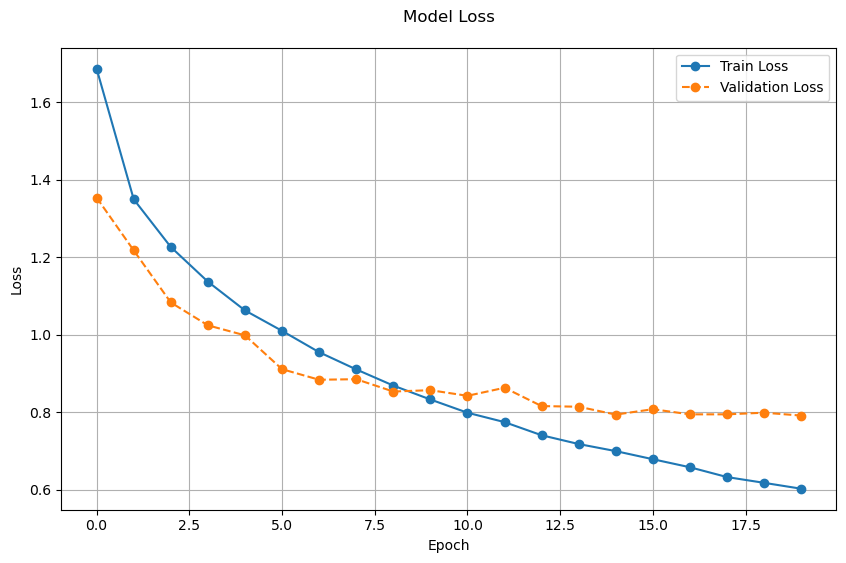

In [30]:
plt.figure(figsize = (10,6))

plt.title("Model Loss\n", size = 12)
plt.plot(train_loss, label = "Train Loss", marker = 'o')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend();

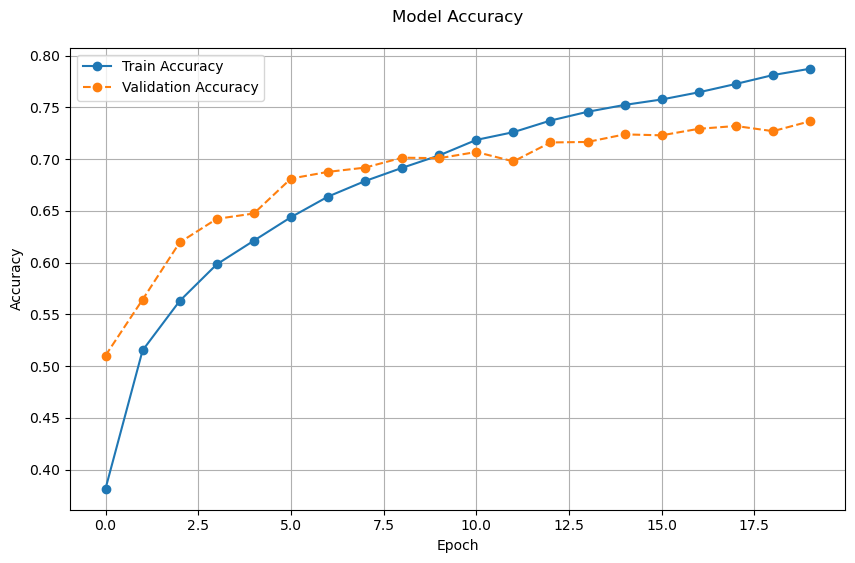

In [31]:
plt.figure(figsize = (10,6))

plt.title("Model Accuracy\n", size = 12)
plt.plot(train_acc, label = "Train Accuracy", marker = 'o')
plt.plot(val_acc, label='Validation Accuracy', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend();

# Evaluating model on Test data

In [32]:
test_loss , test_acc = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7225 - loss: 0.8168


In [33]:
print(f'Loss on test data is: {test_loss}')
print(f"Accuracy on test data is: {test_acc}")

Loss on test data is: 0.8157601356506348
Accuracy on test data is: 0.7226999998092651


# Prediction from model

In [36]:
img_15 = np.expand_dims(x_test[15], axis = 0)

pred_1 = model.predict(img_15)
pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([[1.2792092e-02, 3.3337076e-04, 2.2505241e-02, 6.1123571e-03,
        1.6667146e-02, 1.5454002e-03, 2.9682270e-01, 1.0093164e-04,
        6.4272904e-01, 3.9177903e-04]], dtype=float32)

In [37]:
pred_1.max()

0.64272904

In [38]:
pred_1.argmax()

8

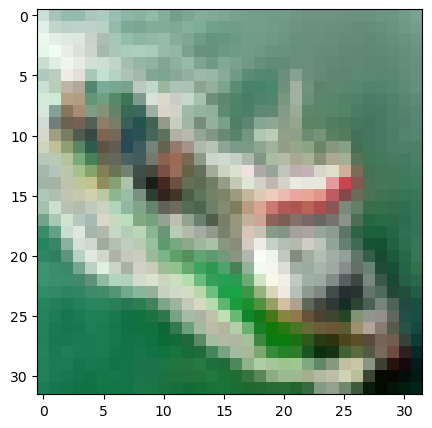

In [39]:
plt.figure(figsize = (10,5))

plt.imshow(x_test[15]);

# Confusion Matrix

In [40]:
all_prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step


In [41]:
predicted_labels = [np.argmax(pred) for pred in all_prediction] 

In [43]:
test_label = [np.argmax(i) for i in y_test]  

In [44]:
predicted_labels[:20]  

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [45]:
test_label[:20]   

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [46]:
# creating confusion matrix

cm = confusion_matrix(labels = test_label, predictions = predicted_labels)

In [47]:
print(cm)

tf.Tensor(
[[771  21  35  12  20   9   7  15  65  45]
 [ 10 815   3   3   3   6   7   2  27 124]
 [ 70   4 576  60 101  70  80  24  10   5]
 [ 21  10  56 487  80 189  85  27  24  21]
 [ 21   3  63  60 687  37  67  46  12   4]
 [ 14   1  25 180  51 641  36  33  10   9]
 [  7   2  32  54  31  13 837   8  10   6]
 [ 15   3  26  40  75  74  10 738   4  15]
 [ 50  31  12  16   9   5   8   2 842  25]
 [ 19  62   3  17   6   9  13  11  27 833]], shape=(10, 10), dtype=int32)


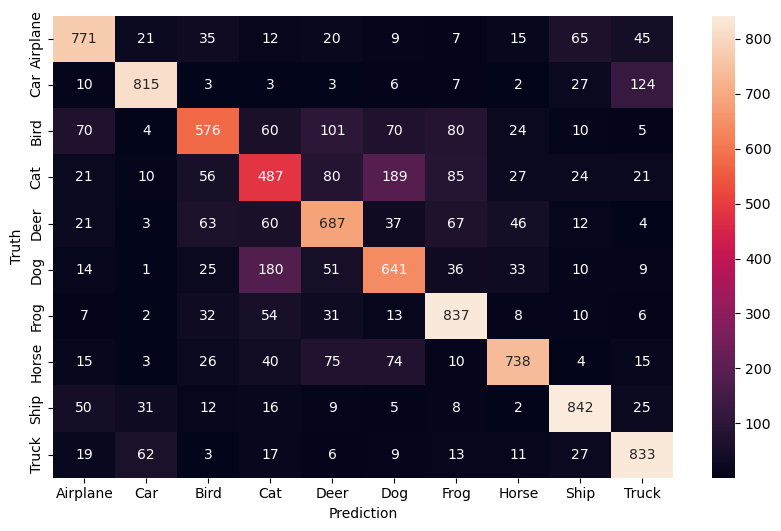

In [48]:
#  Visualizing using seaborn

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd').set(xticklabels = classes, yticklabels = classes)
plt.xlabel("Prediction", size = 10)
plt.ylabel("Truth",  size = 10)
plt.show()

# Classification Report

In [49]:
print(classification_report(test_label, predicted_labels))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.86      0.81      0.84      1000
           2       0.69      0.58      0.63      1000
           3       0.52      0.49      0.50      1000
           4       0.65      0.69      0.67      1000
           5       0.61      0.64      0.62      1000
           6       0.73      0.84      0.78      1000
           7       0.81      0.74      0.77      1000
           8       0.82      0.84      0.83      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

